<a href="https://colab.research.google.com/github/ghonilcloud/DS_PHASE2/blob/main/FODS_EV_Proposal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import re
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-dark-palette')

<ipython-input-1-059b95718ca5>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


In [2]:
df1 = pd.read_csv('/content/df1.csv')
df2 = pd.read_csv('/content/df2.csv')
df1_copy = df1
df2_copy = df2


In [121]:
df1.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,981120,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,2700,00,430,2022339580,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,989530,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,200,00,150,2644251780,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,980310,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,840,00,110,1149620250,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,980120,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,2080,00,10,2327246700,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,989080,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,420,00,140,2210235890,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180265,1C4RJXU65R,Spokane,Spokane Valley,WA,990370,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,210,00,40,2651430910,POINT (-117.193798 47.646855),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10
180266,5YJ3E1EBXP,Snohomish,Lynnwood,WA,980370,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,00,320,2260645900,POINT (-122.283973 47.838697),PUGET SOUND ENERGY INC,5.306105e+10
180267,1G1RD6E48F,King,Seattle,WA,981680,2015,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,380,00,340,2615584190,POINT (-122.297205 47.486649),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303303e+10
180268,3FA6P0SU0F,Pierce,Tacoma,WA,984060,2015,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,190,00,280,1622638670,POINT (-122.498503 47.262687),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10


In [ ]:
df2.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [ ]:
df1.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
191402,5YJ3E1EA0K,Pierce,Sumner,WA,98390.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,31.0,314927896,POINT (-122.2337855 47.2055969),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
191403,JN1BF0BA7P,Pierce,Wilkeson,WA,98396.0,2023,NISSAN,ARIYA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,236213120,POINT (-122.0478543 47.1075591),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
191404,7SAYGDEE4R,King,Fall City,WA,98024.0,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,261335896,POINT (-121.903093 47.567116),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
191405,7SAXCBE65N,Grays Harbor,Aberdeen,WA,98520.0,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,19.0,219273491,POINT (-123.807422 46.978243),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...,5.302700e+10
191406,7SAYGAEEXP,Benton,Richland,WA,99352.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,8.0,233761440,POINT (-119.2958528 46.2421419),BONNEVILLE POWER ADMINISTRATION||CITY OF RICHL...,5.300501e+10


In [ ]:
df2.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
150477,WBY43AW05P,Grays Harbor,Montesano,WA,98563.0,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,19.0,251204075,POINT (-123.60535 46.982215),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...,5.302700e+10
150478,5YJ3E1EB7P,King,Seattle,WA,98104.0,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,43.0,241344414,POINT (-122.329075 47.6018),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
150479,5YJYGDEEXM,King,Seattle,WA,98109.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,43.0,180705626,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
150480,5UXTA6C08P,Snohomish,Mountlake Terrace,WA,98043.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,1.0,240473950,POINT (-122.30842 47.78416),PUGET SOUND ENERGY INC,5.306105e+10
150481,7SAYGDEF8N,Skagit,Mount Vernon,WA,98273.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,40.0,207667589,POINT (-122.338975 48.41333),PUGET SOUND ENERGY INC,5.305795e+10


In [ ]:
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191407 entries, 0 to 191406
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         191407 non-null  object 
 1   County                                             191403 non-null  object 
 2   City                                               191403 non-null  object 
 3   State                                              191407 non-null  object 
 4   Postal Code                                        191403 non-null  float64
 5   Model Year                                         191407 non-null  int64  
 6   Make                                               191407 non-null  object 
 7   Model                                              191407 non-null  object 
 8   Electric Vehicle Type                              191407 non-null  object

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,191403.000000,191407.000000,191407.000000,191407.000000,190993.000000,1.914070e+05,1.914030e+05
mean,98177.823603,2020.732335,55.657442,994.773258,29.016880,2.237202e+08,5.297759e+10
std,2392.808886,2.990487,90.151930,8050.523372,14.909417,7.398058e+07,1.573588e+09
min,1731.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.861622e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,33.000000,2.328176e+08,5.303303e+10
75%,98371.000000,2023.000000,72.000000,0.000000,42.000000,2.589708e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [ ]:
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150482 non-null  object 
 1   County                                             150479 non-null  object 
 2   City                                               150479 non-null  object 
 3   State                                              150482 non-null  object 
 4   Postal Code                                        150479 non-null  float64
 5   Model Year                                         150482 non-null  int64  
 6   Make                                               150482 non-null  object 
 7   Model                                              150482 non-null  object 
 8   Electric Vehicle Type                              150482 non-null  object

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,150479.000000,150482.000000,150482.000000,150482.000000,150141.000000,1.504820e+05,1.504790e+05
mean,98168.344154,2020.005436,67.877839,1312.644735,29.343950,2.111122e+08,5.297195e+10
std,2473.612184,3.015209,96.230009,9231.310215,14.824829,8.196388e+07,1.638841e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.693473e+08,5.303301e+10
50%,98122.000000,2021.000000,18.000000,0.000000,33.000000,2.150306e+08,5.303303e+10
75%,98370.000000,2023.000000,97.000000,0.000000,43.000000,2.399119e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


Rows limited to 10000 due to google collab crashing

In [42]:
#Count all missing values in dataset

missing_values1 = df1.isnull().sum()
print(missing_values1)

missing_rows1 = df1[df1.isnull().any(axis=1)]
display(missing_rows1)

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         1
Base MSRP                                              1
Legislative District                                 331
DOL Vehicle ID                                         1
Vehicle Location                                       7
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
121,5YJ3E1EA5K,NaN,NaN,BC,NaN,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,NaN,475254825.0,NaN,NaN,NaN
123,1G1RB6S53J,NaN,NaN,BC,NaN,2018,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53.0,0.0,NaN,477613216.0,NaN,NaN,NaN
169,5YJSA1E21J,NaN,NaN,AE,NaN,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249.0,0.0,NaN,220643132.0,NaN,NaN,NaN
170,5YJXCAE40H,Maricopa,Goodyear,AZ,85338.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200.0,0.0,NaN,226154610.0,POINT (-112.4087632 33.4136365),NON WASHINGTON STATE ELECTRIC UTILITY,4.013061e+09
35058,7SAYGDEEXP,Wake,Holly Springs,NC,27540.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,NaN,228246182.0,POINT (-78.8379417 35.6451535),NON WASHINGTON STATE ELECTRIC UTILITY,3.718305e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179193,YV4ED3UL1P,Pima,Tucson,AZ,85718.0,2023,VOLVO,XC40,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,NaN,228303218.0,POINT (-110.9156341 32.3050619),NON WASHINGTON STATE ELECTRIC UTILITY,4.019005e+09
179655,1N4BZ0CP3H,Prince William,Manassas,VA,20111.0,2017,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,107.0,0.0,NaN,261843732.0,POINT (-77.440737 38.763617),NON WASHINGTON STATE ELECTRIC UTILITY,5.115390e+10
179917,1G1RD6E45D,Clark,Laughlin,NV,89029.0,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.0,0.0,NaN,5204412.0,POINT (-114.619739 35.1391179),NON WASHINGTON STATE ELECTRIC UTILITY,3.200301e+10
180117,5YJXCAE21H,El Paso,El Paso,TX,79911.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200.0,0.0,NaN,347980755.0,POINT (-106.5687955 31.8947073),NON WASHINGTON STATE ELECTRIC UTILITY,4.814101e+10


In [43]:
#Count all missing values in dataset

missing_values2 = df2.isnull().sum()
print(missing_values2)

missing_rows2 = df2[df2.isnull().any(axis=1)]
display(missing_rows2)

VIN (1-10)                                             0
County                                                 1
City                                                   1
State                                                  0
Postal Code                                            1
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 170
DOL Vehicle ID                                         0
Vehicle Location                                       5
Electric Utility                                       1
2020 Census Tract                                      1
dtype: int64


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
63985,KNDCD3LD6N,Marin,San Rafael,CA,94901.0,2022,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,NaN,181521700,POINT (-122.5260879 37.9702346),NON WASHINGTON STATE ELECTRIC UTILITY,6.041111e+09
76254,WA11AAGE5P,Lake,Libertyville,IL,60048.0,2023,AUDI,E-TRON,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,NaN,237839185,POINT (-87.95161 42.28444),NON WASHINGTON STATE ELECTRIC UTILITY,1.709786e+10
77059,2C4RC1N72J,Douglas,Omaha,NE,68135.0,2018,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,NaN,322474764,POINT (-96.1699821 41.1973705),NON WASHINGTON STATE ELECTRIC UTILITY,3.105501e+10
78462,5YJYGDED0M,San Diego,San Diego,CA,92131.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,NaN,187492175,POINT (-117.090485 32.932535),NON WASHINGTON STATE ELECTRIC UTILITY,6.073017e+09
80649,5YJYGDEF3L,Platte,Platte City,MO,64079.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,NaN,132400684,POINT (-94.77962 39.36557),NON WASHINGTON STATE ELECTRIC UTILITY,2.916503e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134221,5YJ3E1EB8K,Placer,Roseville,CA,95661.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,477326650,POINT (-121.27206 38.731565),NON WASHINGTON STATE ELECTRIC UTILITY,6.061021e+09
134273,5YJSA1CG3D,Riverside,Indio,CA,92201.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,NaN,239204752,POINT (-116.21818 33.71927),NON WASHINGTON STATE ELECTRIC UTILITY,6.065046e+09
134607,5YJSA1H16E,Los Angeles,Los Angeles,CA,90005.0,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,NaN,143684943,POINT (-118.291115 34.0587),NON WASHINGTON STATE ELECTRIC UTILITY,6.037212e+09
134746,2T3YL4DV4D,San Diego,San Diego,CA,92154.0,2013,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,103,0,NaN,182327218,POINT (-117.09543 32.57934),NON WASHINGTON STATE ELECTRIC UTILITY,6.073010e+09


In [3]:
#Remove all missing null values from the dataset by dropping them

df1 = df1.dropna()
missing_rows3 = df1[df1.isnull().any(axis=1)]
display(missing_rows3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract


In [4]:
#Remove all missing null values from the dataset by dropping them

df2 = df2.dropna()
missing_rows4 = df2[df2.isnull().any(axis=1)]
display(missing_rows4)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract


In [5]:
#For columns that are not supposed to contain numerical numbers 0-9, any numbers will be replaced with ' '

columns_to_clean = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID']

for col in columns_to_clean:
    df1[col] = df1[col].apply(lambda x: re.sub(r'[^0-9]+', '', str(x)))

<ipython-input-5-1b0253b64040>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].apply(lambda x: re.sub(r'[^0-9]+', '', str(x)))


In [6]:
#For columns that are not supposed to contain numerical numbers 0-9, any numbers will be replaced with ' '

columns_to_clean = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID']

for col in columns_to_clean:
    df2[col] = df2[col].apply(lambda x: re.sub(r'[^0-9]+', '', str(x)))

<ipython-input-6-2063be3440d5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = df2[col].apply(lambda x: re.sub(r'[^0-9]+', '', str(x)))


In [48]:
df1.shape[0]

179938

In [49]:
df2.shape[0]

134633

In [51]:
df1['Make'].unique()

array(['TESLA', 'BMW', 'NISSAN', 'TOYOTA', 'FORD', 'FIAT', 'CHRYSLER',
       'AUDI', 'VOLVO', 'PORSCHE', 'JEEP', 'HYUNDAI', 'VOLKSWAGEN',
       'CHEVROLET', 'KIA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'HONDA',
       'RIVIAN', 'JAGUAR', 'DODGE', 'CADILLAC', 'LUCID', 'SUBARU',
       'POLESTAR', 'LEXUS', 'SMART', 'ALFA ROMEO', 'MAZDA', 'FISKER',
       'LINCOLN', 'GENESIS', 'LAND ROVER', 'GMC', 'TH!NK',
       'AZURE DYNAMICS', 'WHEEGO ELECTRIC CARS', 'BENTLEY', 'ROLLS ROYCE',
       'ACURA', 'RAM'], dtype=object)

In [52]:
df2['Make'].unique()

array(['HYUNDAI', 'JEEP', 'TESLA', 'BMW', 'CHRYSLER', 'FORD', 'TOYOTA',
       'AUDI', 'NISSAN', 'KIA', 'CHEVROLET', 'VOLKSWAGEN', 'FIAT', 'MINI',
       'SMART', 'RIVIAN', 'VOLVO', 'PORSCHE', 'HONDA', 'MITSUBISHI',
       'SUBARU', 'POLESTAR', 'MERCEDES-BENZ', 'CADILLAC', 'JAGUAR',
       'LINCOLN', 'GENESIS', 'LUCID', 'LEXUS', 'FISKER', 'MAZDA',
       'LAND ROVER', 'TH!NK', 'AZURE DYNAMICS', 'ALFA ROMEO',
       'WHEEGO ELECTRIC CARS', 'BENTLEY'], dtype=object)

In [50]:
#Total count of EVs for each brand

df1_ev_count = df1["Make"].value_counts()
df1_ev_count

,count
Make,
TESLA,79652
CHEVROLET,13398
NISSAN,13385
FORD,9337
KIA,8140
BMW,7582
TOYOTA,6699
VOLKSWAGEN,5093
JEEP,4699


In [53]:
#Total count of EVs for each brand

df2_ev_count = df2["Make"].value_counts()
df2_ev_count

,count
Make,
TESLA,61551
NISSAN,12212
CHEVROLET,10692
FORD,6687
BMW,5770
KIA,5520
TOYOTA,4659
VOLKSWAGEN,3660
VOLVO,3201


In [54]:
#Total count of EVs of each type of model

df1["Model"].value_counts()

,count
Model,
MODEL Y,37163
MODEL 3,29106
LEAF,12652
MODEL S,7440
BOLT EV,6073
...,...
PROMASTER 3500,2
918,1
ZDX,1


In [55]:
#Total count of EVs of each type of model

df2["Model"].value_counts()

,count
Model,
MODEL Y,25366
MODEL 3,24694
LEAF,11948
MODEL S,6850
BOLT EV,5159
...,...
A8 E,3
WHEEGO,3
745LE,2


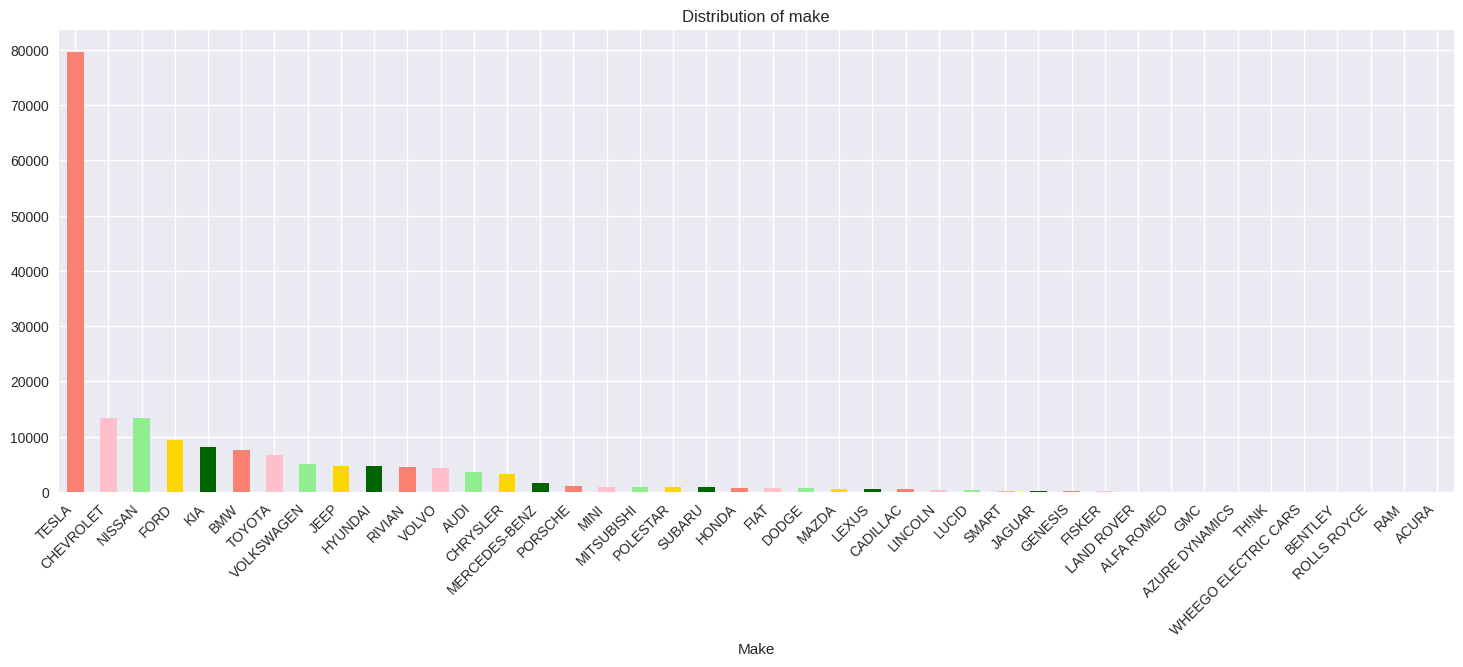

In [105]:
#Bar graph representing the total population of EVs in regards to car brands

top_makes = df1["Make"].value_counts()
plt.figure(figsize=(18, 6))
top_makes.plot(kind='bar', color = ['salmon','pink' , 'lightgreen', 'gold', 'darkgreen'])
plt.title('Distribution of make')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

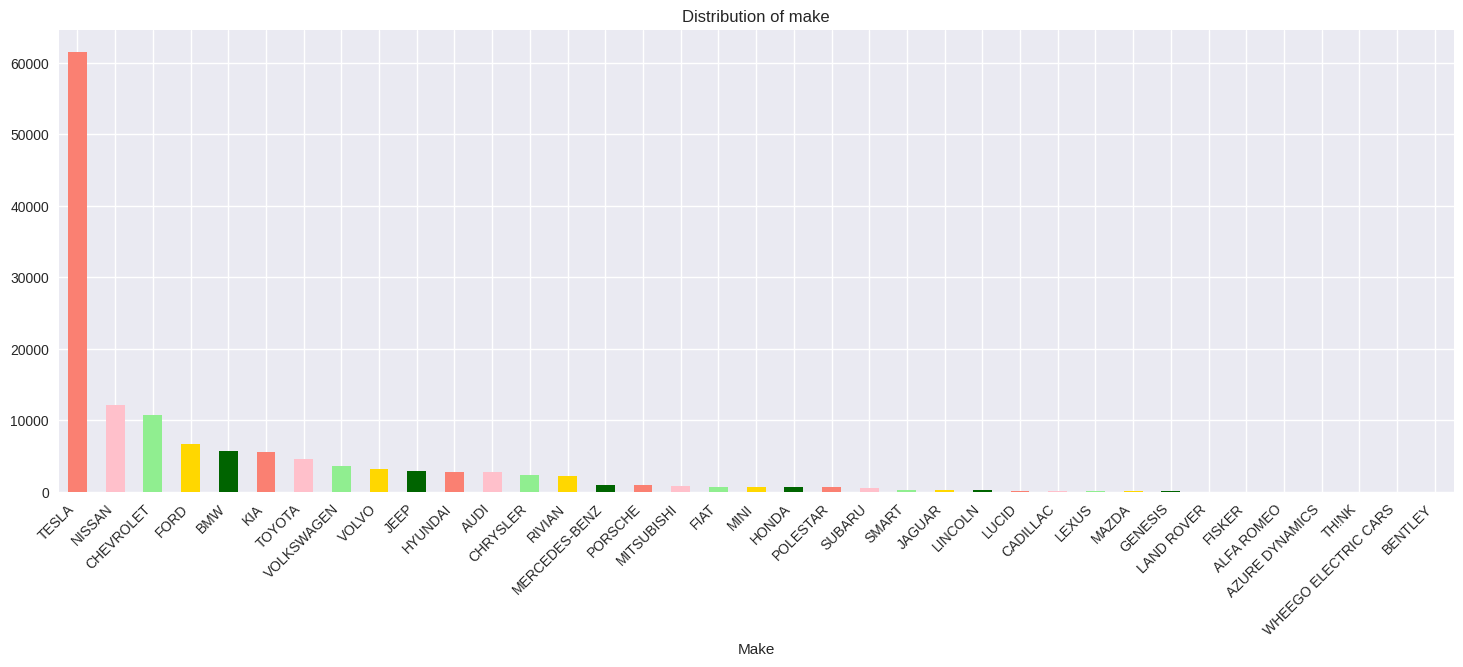

In [104]:
#Bar graph representing the total population of EVs in regards to car brands

top_makes = df2["Make"].value_counts()
plt.figure(figsize=(18, 6))
top_makes.plot(kind='bar', color = ['salmon','pink' , 'lightgreen', 'gold', 'darkgreen'])
plt.title('Distribution of make')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

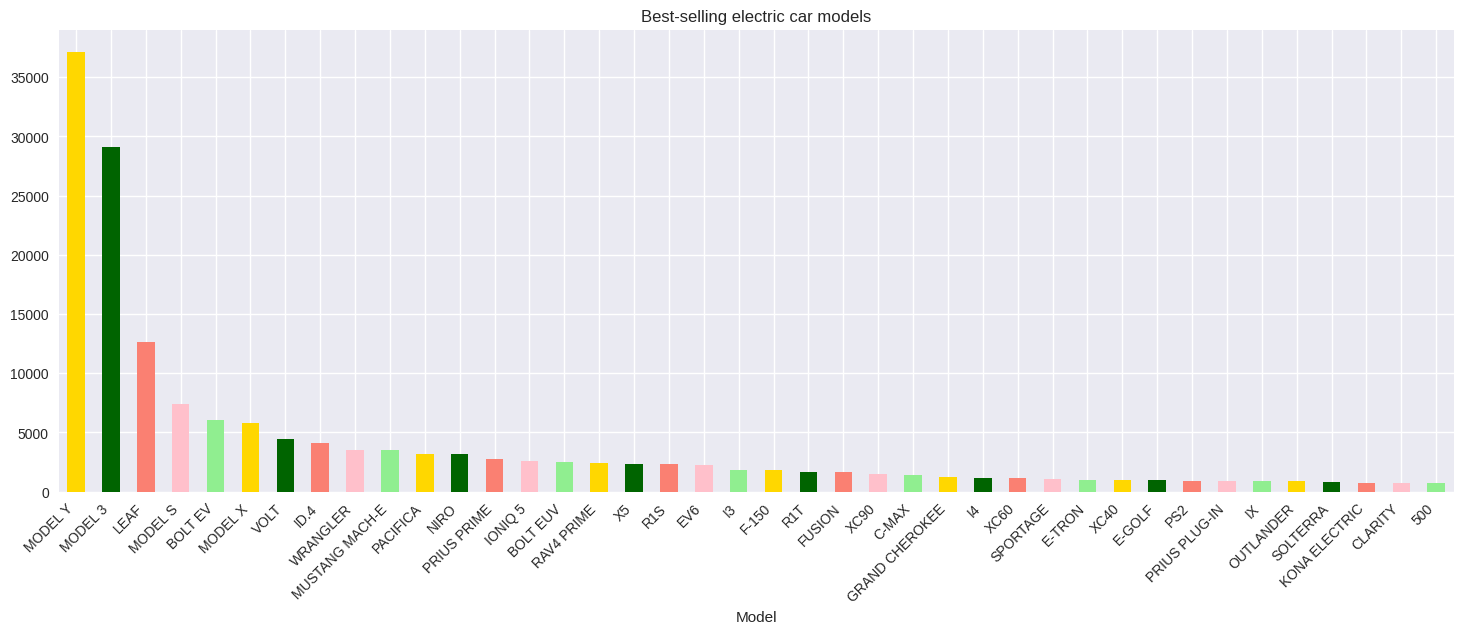

In [103]:
#Bar graph representing the total population of EVs in regards to model

models = df1["Model"].value_counts().head(40)
plt.figure(figsize=(18, 6))
models.plot(kind='bar', color = ['gold', 'darkgreen','salmon','pink' , 'lightgreen', ])

plt.title('Best-selling electric car models')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.show()

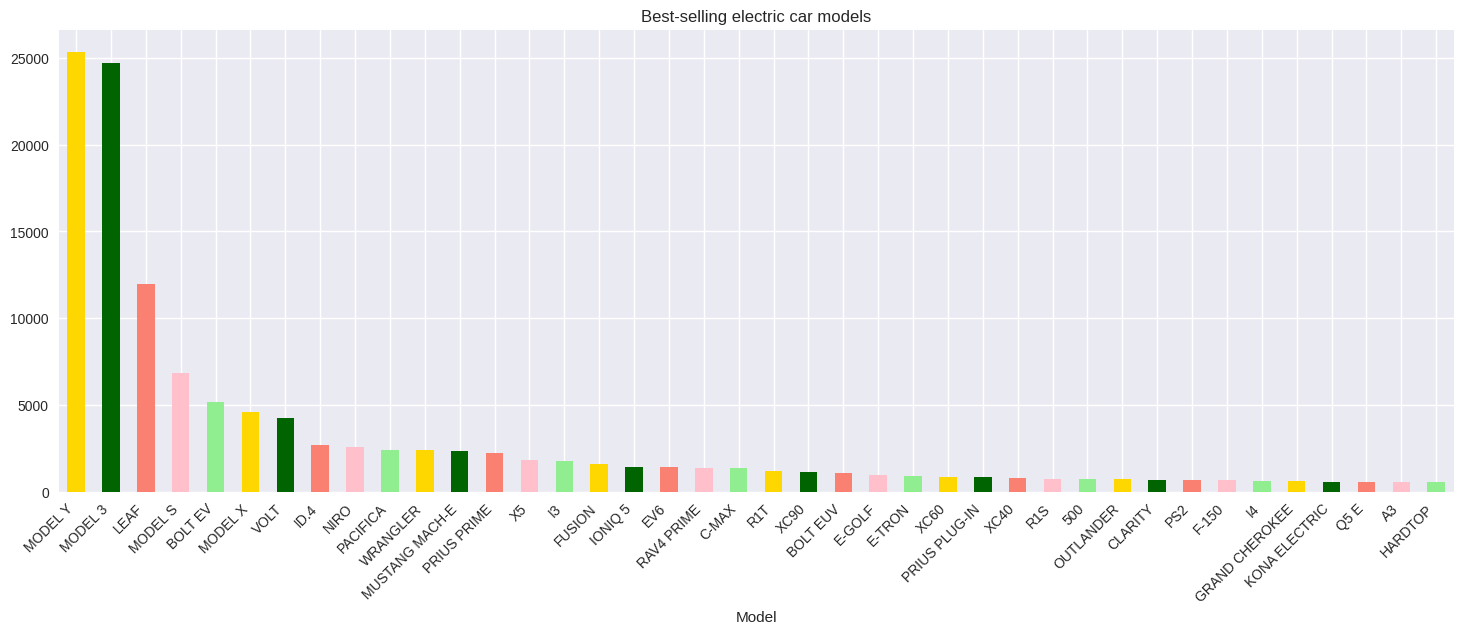

In [102]:
#Bar graph representing the total population of EVs in regards to model

models = df2["Model"].value_counts().head(40)
plt.figure(figsize=(18, 6))
models.plot(kind='bar', color = ['gold', 'darkgreen','salmon','pink' , 'lightgreen', ])

plt.title('Best-selling electric car models')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

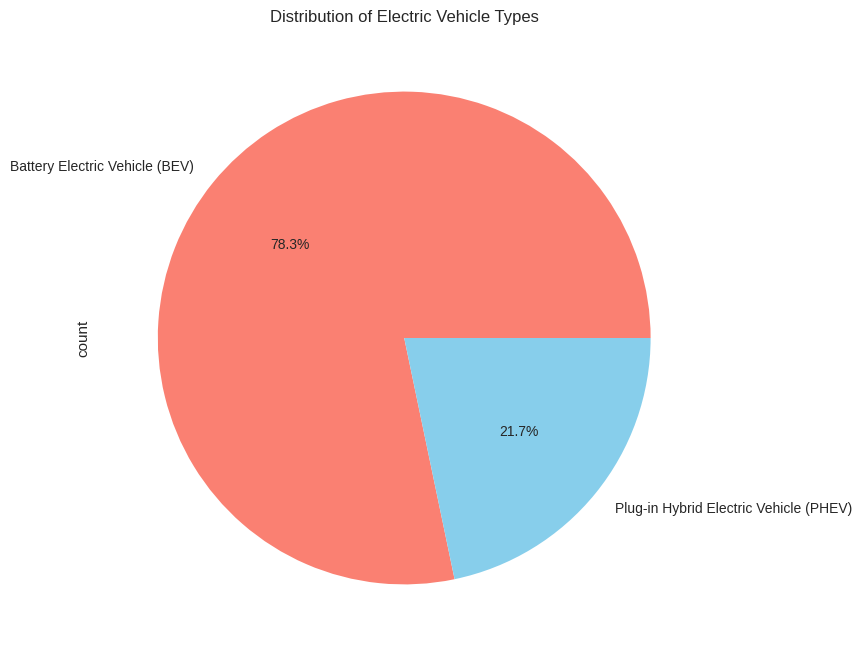

In [68]:
#Pie chart representing the different types of EVs and their distribution

plt.figure(figsize=(10, 8))
df1['Electric Vehicle Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors = ['salmon' , 'skyblue'])
plt.title('Distribution of Electric Vehicle Types')
plt.show()

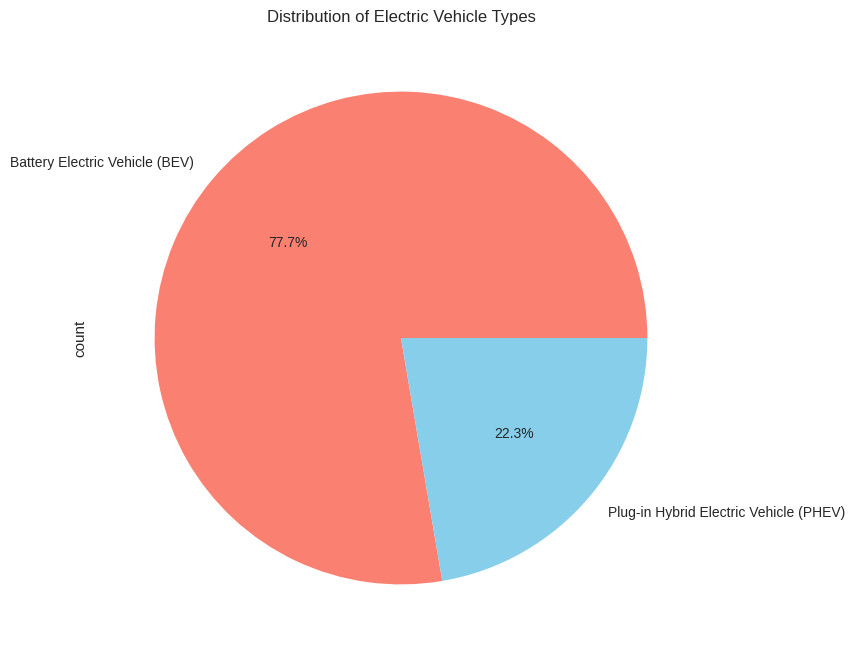

In [69]:
#Pie chart representing the different types of EVs and their distribution

plt.figure(figsize=(10, 8))
df2['Electric Vehicle Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors = ['salmon' , 'skyblue'])
plt.title('Distribution of Electric Vehicle Types')
plt.show()

In [78]:
# Group by County and City and count the number of cars
car_counts = df1.groupby(['County', 'City']).size().reset_index(name='Car Count')

# Display the result
car_counts

,County,City,Car Count
0,Adams,Hatton,1
1,Adams,Lind,2
2,Adams,Othello,31
3,Adams,Ritzville,17
4,Adams,Washtucna,1
...,...,...,...
507,Yakima,Union Gap,12
508,Yakima,Wapato,13
509,Yakima,White Swan,1
510,Yakima,Yakima,727


In [79]:
# Group by County and City and count the number of cars
car_counts2 = df2.groupby(['County', 'City']).size().reset_index(name='Car Count')

# Display the result
car_counts2

,County,City,Car Count
0,Adams,Hatton,1
1,Adams,Lind,2
2,Adams,Othello,15
3,Adams,Ritzville,11
4,Asotin,Asotin,9
...,...,...,...
470,Yakima,Union Gap,5
471,Yakima,Wapato,8
472,Yakima,White Swan,1
473,Yakima,Yakima,502


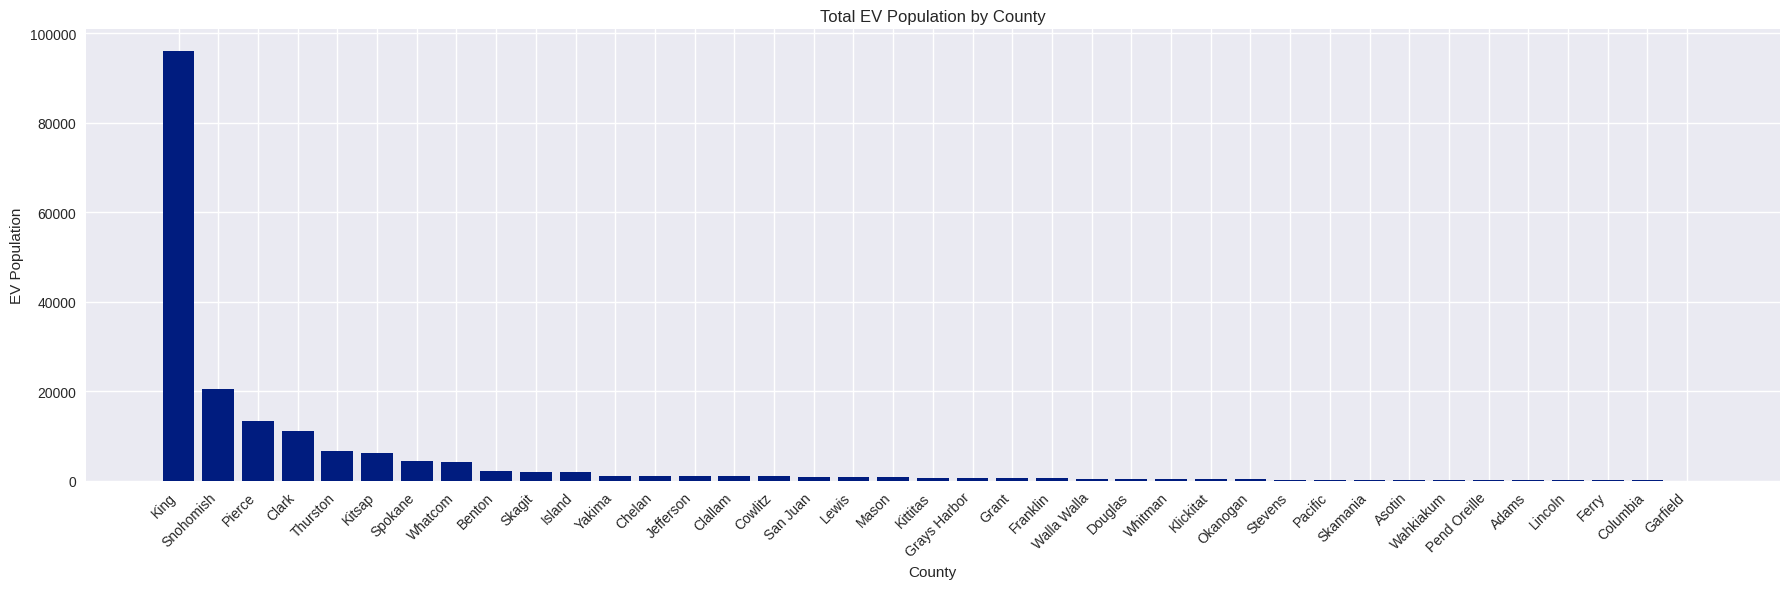

In [101]:
# Aggregate the data by City and sum the Car Counts
county_counts = car_counts.groupby('County')['Car Count'].sum().reset_index()

# Sort the data in descending order
county_counts = county_counts.sort_values(by='Car Count', ascending=False)

# Create a bar chart
plt.figure(figsize=(18, 6))
plt.bar(county_counts['County'], county_counts['Car Count'])

# Adding titles and labels
plt.title('Total EV Population by County')
plt.xlabel('County')
plt.ylabel('EV Population')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

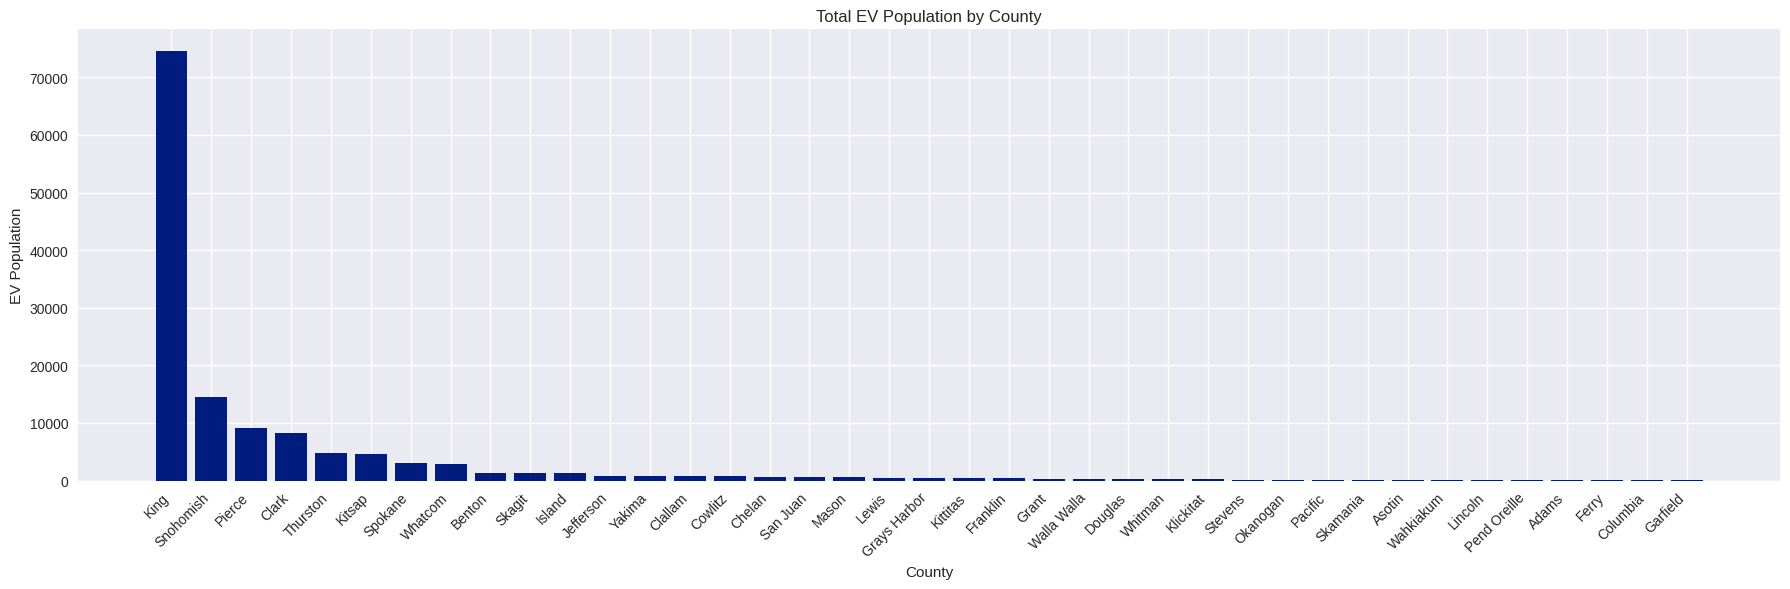

In [100]:
# Aggregate the data by City and sum the Car Counts
county_counts2 = car_counts2.groupby('County')['Car Count'].sum().reset_index()

# Sort the data in descending order
county_counts2 = county_counts2.sort_values(by='Car Count', ascending=False)

# Create a bar chart
plt.figure(figsize=(18, 6))
plt.bar(county_counts2['County'], county_counts2['Car Count'])

# Adding titles and labels
plt.title('Total EV Population by County')
plt.xlabel('County')
plt.ylabel('EV Population')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

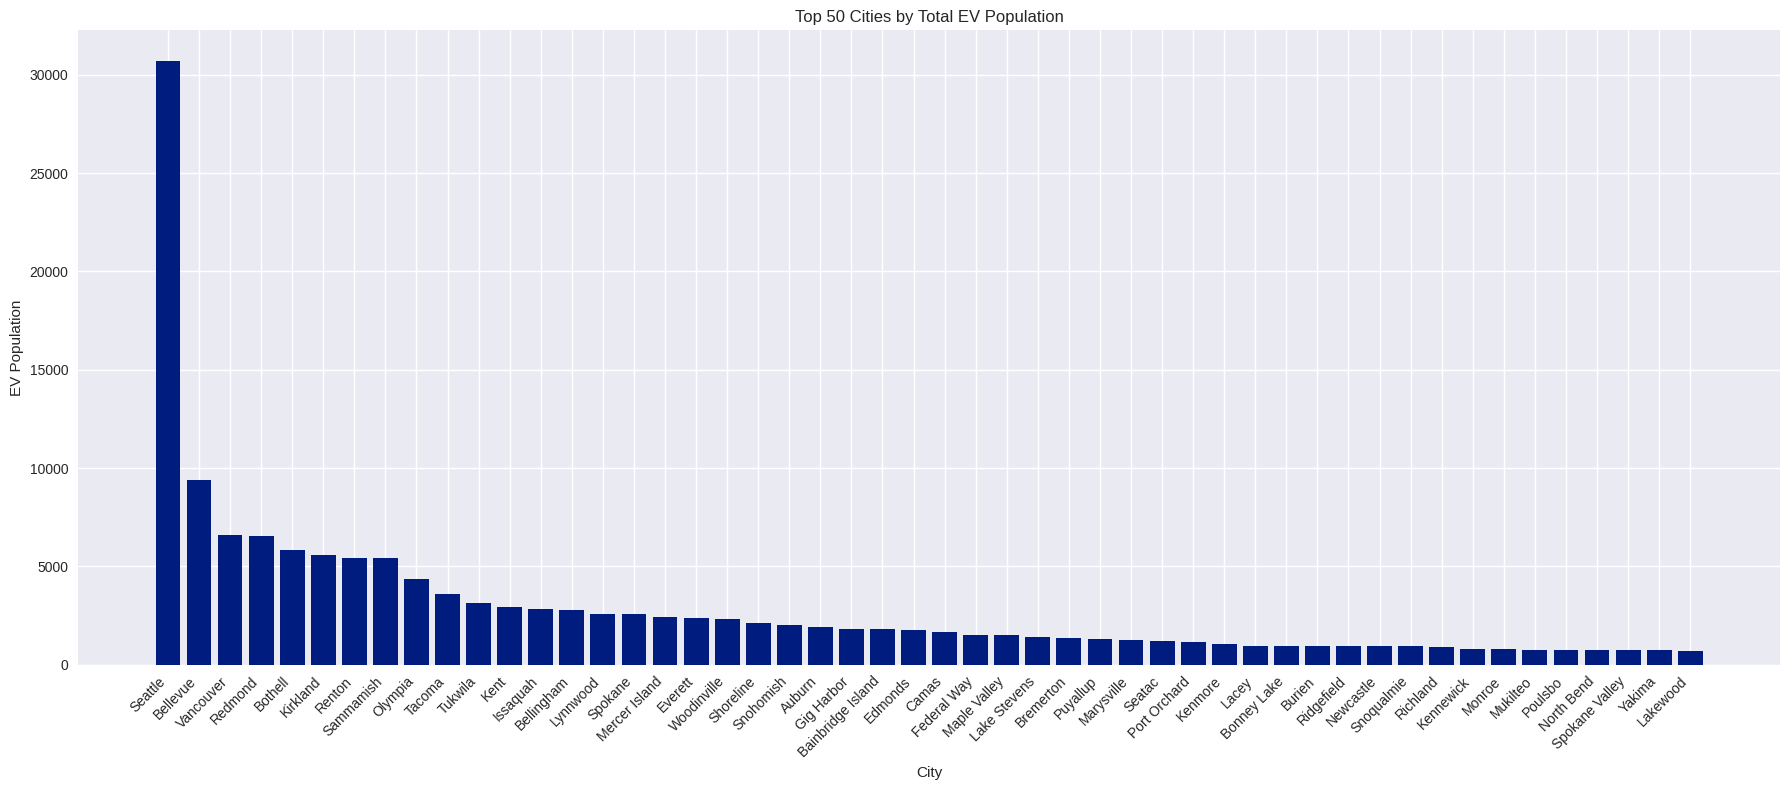

In [87]:
# Aggregate the data by City and sum the Car Counts
city_counts = car_counts.groupby('City')['Car Count'].sum().reset_index()

# Sort the data in descending order
city_counts = city_counts.sort_values(by='Car Count', ascending=False)

# Limit to the top 50 cities
top_50_cities = city_counts.head(50)

# Create a bar chart
plt.figure(figsize=(18, 8))  # Adjusted size for better visibility
plt.bar(top_50_cities['City'], top_50_cities['Car Count'])

# Adding titles and labels
plt.title('Top 50 Cities by Total EV Population')
plt.xlabel('City')
plt.ylabel('EV Population')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

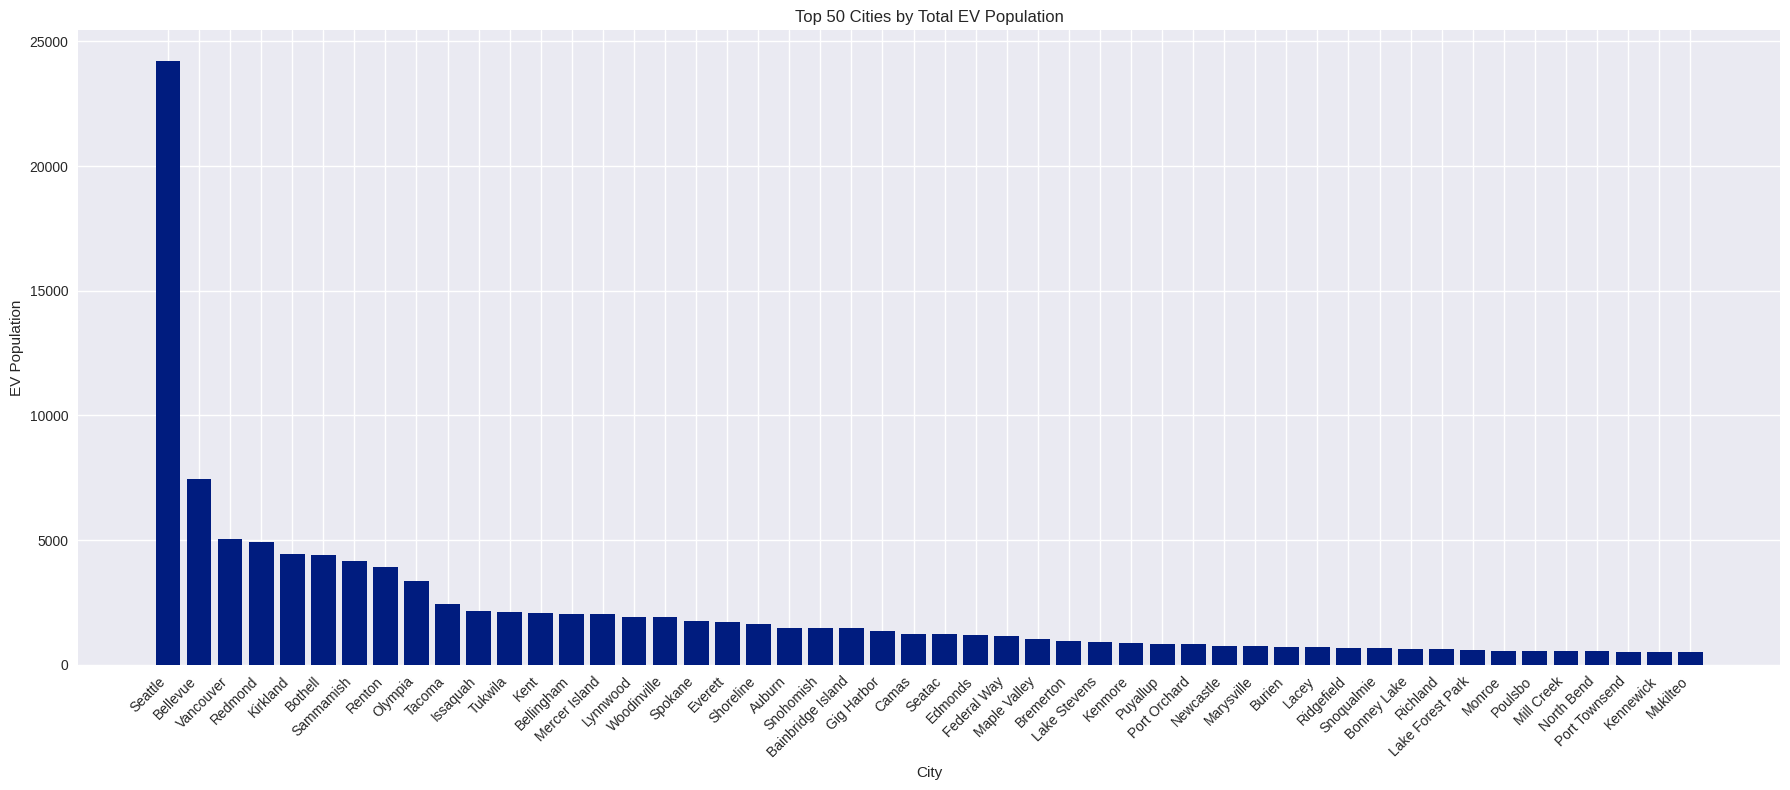

In [89]:
# Aggregate the data by City and sum the Car Counts
city_counts2 = car_counts2.groupby('City')['Car Count'].sum().reset_index()

# Sort the data in descending order
city_counts2 = city_counts2.sort_values(by='Car Count', ascending=False)

# Limit to the top 50 cities
top_50_cities_2 = city_counts2.head(50)

# Create a bar chart
plt.figure(figsize=(18, 8))  # Adjusted size for better visibility
plt.bar(top_50_cities_2['City'], top_50_cities_2['Car Count'])

# Adding titles and labels
plt.title('Top 50 Cities by Total EV Population')
plt.xlabel('City')
plt.ylabel('EV Population')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

In [90]:
df_washington = pd.read_csv('/content/washpop.csv')
df_washington

,year,fips,pop2020,pop2024,state,stateCode,growthSince2020,name,county,slug,landArea,density,rank,densityMi,areaMi
0,2024,53033,2274282,2277449,Washington,WA,0.001393,King County,King County,washington/king-county,2116,1076.299149,1,1076.299149,2116
1,2024,53053,923589,930913,Washington,WA,0.007930,Pierce County,Pierce County,washington/pierce-county,1668,558.101319,2,558.101319,1668
2,2024,53061,829933,849070,Washington,WA,0.023058,Snohomish County,Snohomish County,washington/snohomish-county,2087,406.837566,3,406.837566,2087
3,2024,53063,541175,553170,Washington,WA,0.022165,Spokane County,Spokane County,washington/spokane-county,1764,313.588435,4,313.588435,1764
4,2024,53011,505338,525563,Washington,WA,0.040023,Clark County,Clark County,washington/clark-county,628,836.883758,5,836.883758,628
5,2024,53067,295998,299367,Washington,WA,0.011382,Thurston County,Thurston County,washington/thurston-county,723,414.062241,6,414.062241,723
6,2024,53035,275823,277503,Washington,WA,0.006091,Kitsap County,Kitsap County,washington/kitsap-county,395,702.539241,7,702.539241,395
7,2024,53077,256733,256267,Washington,WA,-0.001815,Yakima County,Yakima County,washington/yakima-county,4295,59.666356,8,59.666356,4295
8,2024,53073,227449,233240,Washington,WA,0.025461,Whatcom County,Whatcom County,washington/whatcom-county,2108,110.645161,9,110.645161,2108
9,2024,53005,207419,217609,Washington,WA,0.049128,Benton County,Benton County,washington/benton-county,1700,128.005294,10,128.005294,1700


In [91]:
df_washington = df_washington.drop(columns=['year', 'fips', 'state', 'stateCode', 'growthSince2020', 'slug', 'rank'])

df_washington['name'] = df_washington['name'].str.replace(' County', '', regex=False)
df_washington['county'] = df_washington['county'].str.replace(' County', '', regex=False)

df_washington

,pop2020,pop2024,name,county,landArea,density,densityMi,areaMi
0,2274282,2277449,King,King,2116,1076.299149,1076.299149,2116
1,923589,930913,Pierce,Pierce,1668,558.101319,558.101319,1668
2,829933,849070,Snohomish,Snohomish,2087,406.837566,406.837566,2087
3,541175,553170,Spokane,Spokane,1764,313.588435,313.588435,1764
4,505338,525563,Clark,Clark,628,836.883758,836.883758,628
5,295998,299367,Thurston,Thurston,723,414.062241,414.062241,723
6,275823,277503,Kitsap,Kitsap,395,702.539241,702.539241,395
7,256733,256267,Yakima,Yakima,4295,59.666356,59.666356,4295
8,227449,233240,Whatcom,Whatcom,2108,110.645161,110.645161,2108
9,207419,217609,Benton,Benton,1700,128.005294,128.005294,1700


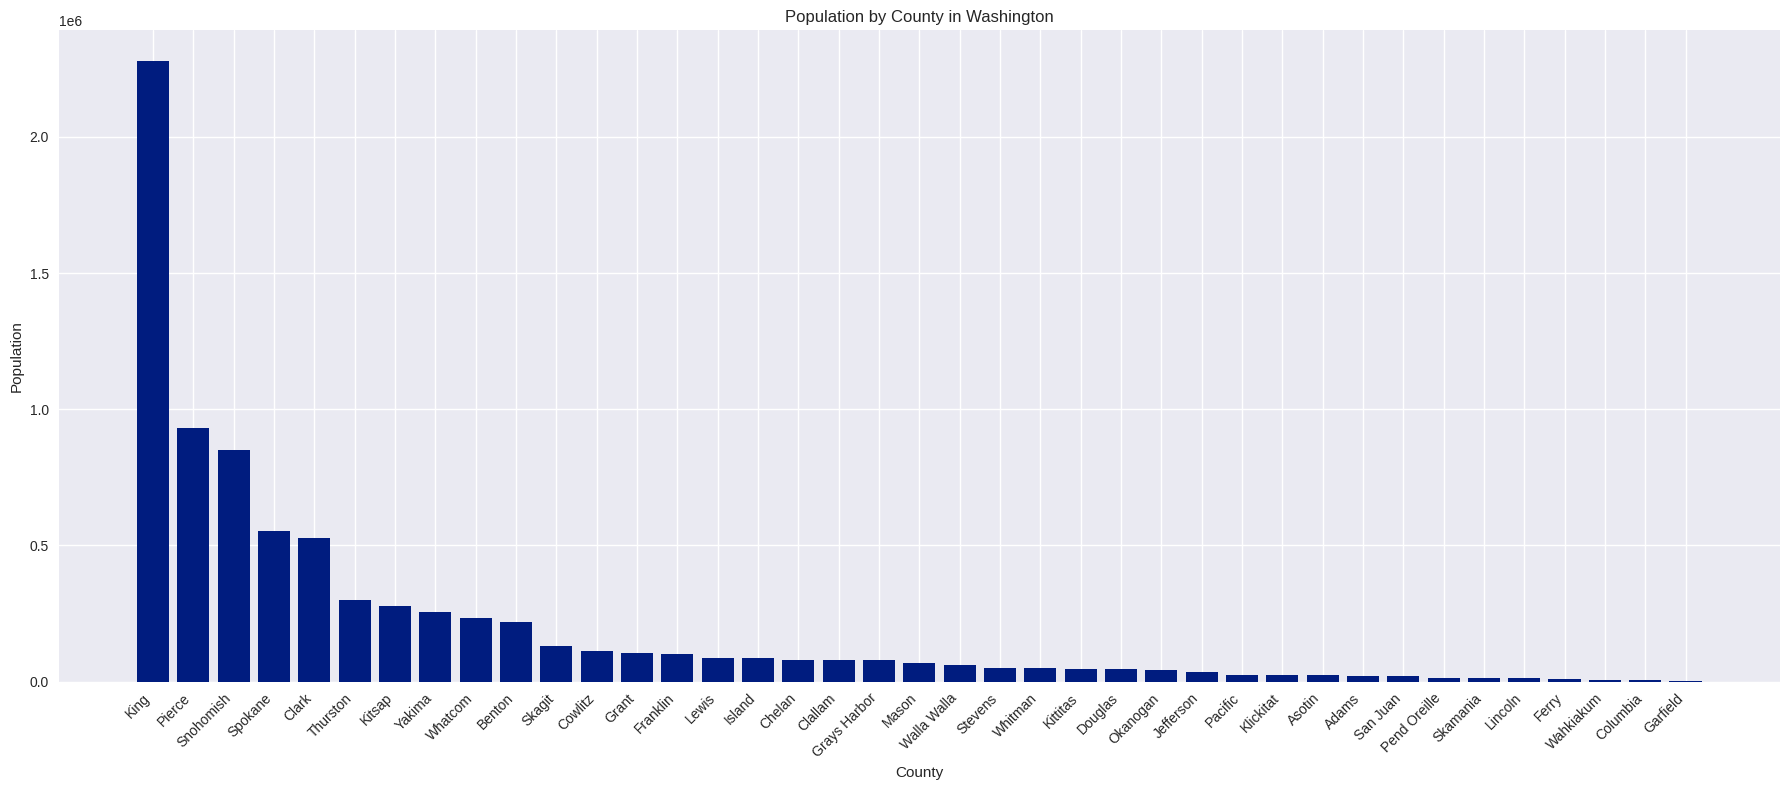

In [94]:
# prompt: use df_washpopdense and matplotlip to make a bar graph displaying the population of each county

df_washpopgraph = df_washington.sort_values('pop2024', ascending=False)

# Create a bar chart of population by county
plt.figure(figsize=(18, 8))
plt.bar(df_washpopgraph['county'], df_washpopgraph['pop2024'])
plt.title('Population by County in Washington')
plt.xlabel('County')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

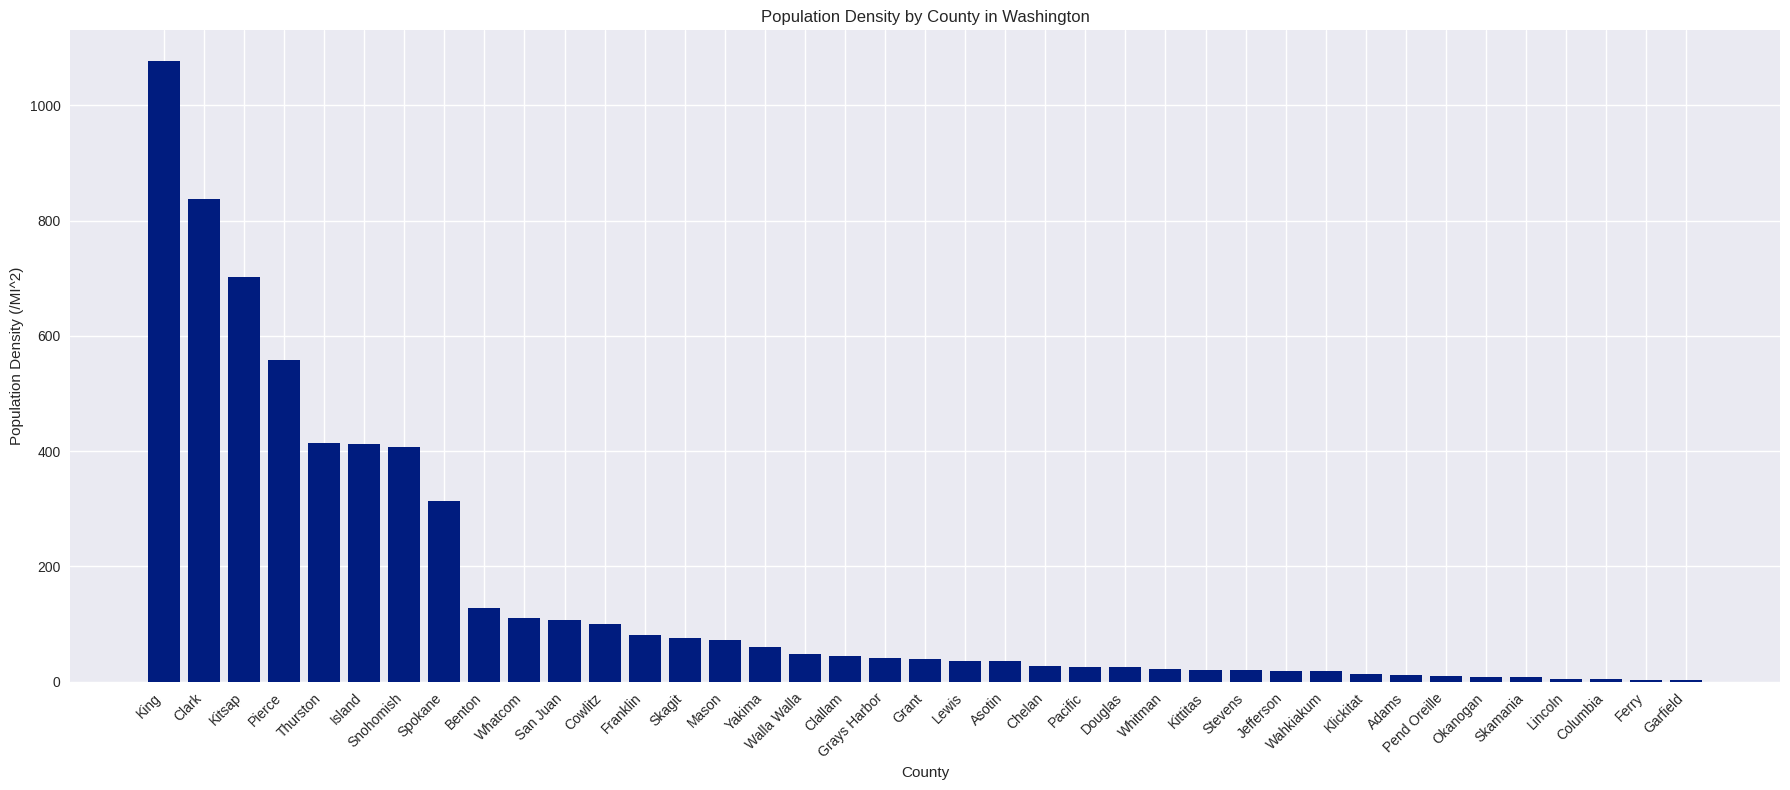

In [96]:
# Create a bar chart of population by county

df_washdensegraph = df_washington.sort_values('density', ascending=False)

plt.figure(figsize=(18, 8))
plt.bar(df_washdensegraph['county'], df_washdensegraph['density'])
plt.title('Population Density by County in Washington')
plt.xlabel('County')
plt.ylabel('Population Density (/MI^2)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [97]:
df_countyGDP = pd.read_csv('/content/washGDP.csv')
df_countyGDP

,County,2019,2020,2021,2022,Rank,2020 change,2021 Change,2022 Change,Rank in State
0,Adams,879537,903697,848784,993916,29,2.7,-6.1,17.1,1
1,Asotin,652902,657568,690061,684569,32,0.7,4.9,-0.8,29
2,Benton,11879894,11478886,12089828,12003056,9,-3.4,5.3,-0.7,28
3,Chelan,4632063,4540557,4813217,4899098,14,-2.0,6.0,1.8,17
4,Clallam,2560039,2501467,2698536,2669936,20,-2.3,7.9,-1.1,30
5,Clark,22133779,22164411,24490108,24511742,5,0.1,10.5,0.1,23
6,Columbia,345341,333032,337883,345160,35,-3.6,1.5,2.2,16
7,Cowlitz,5231999,5302398,5473446,5449102,13,1.3,3.2,-0.4,27
8,Douglas,1851350,1866829,1857454,1905866,22,0.8,-0.5,2.6,13
9,Ferry,171981,190828,189452,184698,37,11.0,-0.7,-2.5,35


In [98]:
df_countyGDP = df_countyGDP.drop(index=0).reset_index(drop=True)

df_countyGDP['County'] = df_countyGDP['County'].str.replace('_', ' ', regex=False)
df_countyGDP.rename(columns={'2021': '2021 GDP'}, inplace=True)
df_countyGDP.rename(columns={'2022': '2022 GDP'}, inplace=True)

df_countyGDP = df_countyGDP.sort_values(by='Rank', ascending=True).reset_index()
df_countyGDP = df_countyGDP.drop(columns=['2019', '2020', '2020 change', '2021 Change', '2022 Change', 'Rank in State', 'index'])

df_countyGDP

,County,2021 GDP,2022 GDP,Rank
0,King,357017192,367176011,1
1,Snohomish,47607563,48304328,2
2,Pierce,47245996,47097871,3
3,Spokane,28849199,28861522,4
4,Clark,24490108,24511742,5
5,Thurston,14725118,15179737,6
6,Whatcom,14284199,13584365,7
7,Kitsap,13081004,13211612,8
8,Benton,12089828,12003056,9
9,Yakima,10676322,10476526,10


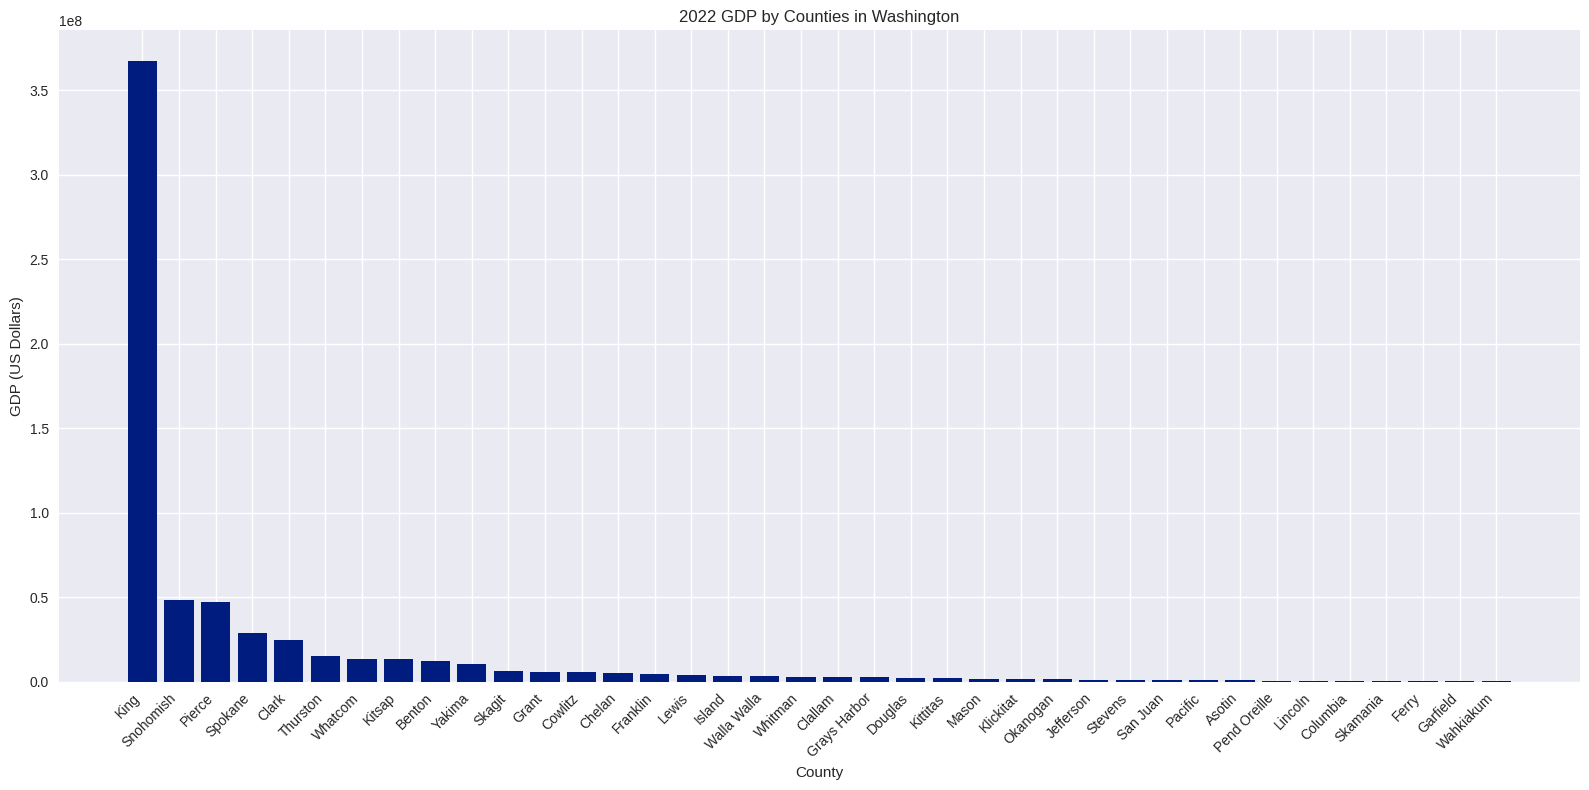

In [99]:
plt.figure(figsize=(16, 8))
plt.bar(df_countyGDP['County'], df_countyGDP['2022 GDP'])
plt.title ('2022 GDP by Counties in Washington')
plt.xlabel('County')
plt.ylabel('GDP (US Dollars)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()